#### 导包

In [708]:
#导入pandas，并重命名为pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
# 导入pytorch包
import torch
from torch.utils import data
from d2l import torch as d2l
from torch import nn
import seaborn as sns
from sklearn.metrics import mean_absolute_error
# 设置显示中文字体
plt.rcParams["font.sans-serif"] = ["SimHei"]

#### 导入原始数据

In [709]:
#导入数据表
#导入 covid.test 表
covid_test = pd.read_csv('data/COVID_19/covid.test.csv', sep = ',')
#导入 covid.train 表
covid_train = pd.read_csv('data/COVID_19/covid.train.csv', sep = ',')
#导入 sampleSubmission 表
sampleSubmission = pd.read_csv(r'C:\Users\Administrator\Desktop\3-COVID-19\sampleSubmission.csv', sep = ',')

#### 数据探索

In [710]:
#用.head()可以显示数据框的前5行
covid_train.head()

,id,AL,AK,AZ,AR,CA,CO,CT,FL,GA,...,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2,tested_positive.2
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.812411,43.430423,16.151527,1.602635,15.409449,12.088688,16.702086,53.991549,43.604229,20.704935
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.682974,43.196313,16.123386,1.641863,15.230063,11.809047,16.506973,54.185521,42.665766,21.292911
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.593983,43.362200,16.159971,1.677523,15.717207,12.355918,16.273294,53.637069,42.972417,21.166656
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.576992,42.954574,15.544373,1.578030,15.295650,12.218123,16.045504,52.446223,42.907472,19.896607
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.091433,43.290957,15.214655,1.641667,14.778802,12.417256,16.134238,52.560315,43.321985,20.178428


In [711]:
covid_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 94 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      893 non-null    int64  
 1   AL                      893 non-null    float64
 2   AK                      893 non-null    float64
 3   AZ                      893 non-null    float64
 4   AR                      893 non-null    float64
 5   CA                      893 non-null    float64
 6   CO                      893 non-null    float64
 7   CT                      893 non-null    float64
 8   FL                      893 non-null    float64
 9   GA                      893 non-null    float64
 10  ID                      893 non-null    float64
 11  IL                      893 non-null    float64
 12  IN                      893 non-null    float64
 13  IA                      893 non-null    float64
 14  KS                      893 non-null    fl

In [712]:
covid_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 95 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2700 non-null   int64  
 1   AL                      2700 non-null   float64
 2   AK                      2700 non-null   float64
 3   AZ                      2700 non-null   float64
 4   AR                      2700 non-null   float64
 5   CA                      2700 non-null   float64
 6   CO                      2700 non-null   float64
 7   CT                      2700 non-null   float64
 8   FL                      2700 non-null   float64
 9   GA                      2700 non-null   float64
 10  ID                      2700 non-null   float64
 11  IL                      2700 non-null   float64
 12  IN                      2700 non-null   float64
 13  IA                      2700 non-null   float64
 14  KS                      2700 non-null   

#### 删除无用列

In [713]:
# 使用drop() 函数进行删除，默认为删除行，axis=1为删除列
# 删除covid_train的id列
covid_train1 = covid_train.drop('id',axis=1)
# 删除covid_test的id列
covid_test1 = covid_test.drop(['id'], axis=1)

In [714]:
# 特征值切分
# 提取州数据  
covid_train_state = covid_train1.iloc[:,0:40]
# 提取第一天数据
covid_train_day1 = covid_train1.iloc[:,40:58]
# 提取第二天数据
covid_train_day2 = covid_train1.iloc[:,58:76]
# 提取第三天数据
covid_train_day3 = covid_train1.iloc[:,76:94]

In [715]:
# 分离特征值与目标变量
# 获得特征值
train = covid_train1.drop(['tested_positive.2'], axis=1)
# 获得目标变量
target = covid_train['tested_positive.2']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16672\2001150935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_train_state['tested_positive.2'] = covid_train['tested_positive.2']
e:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
e:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


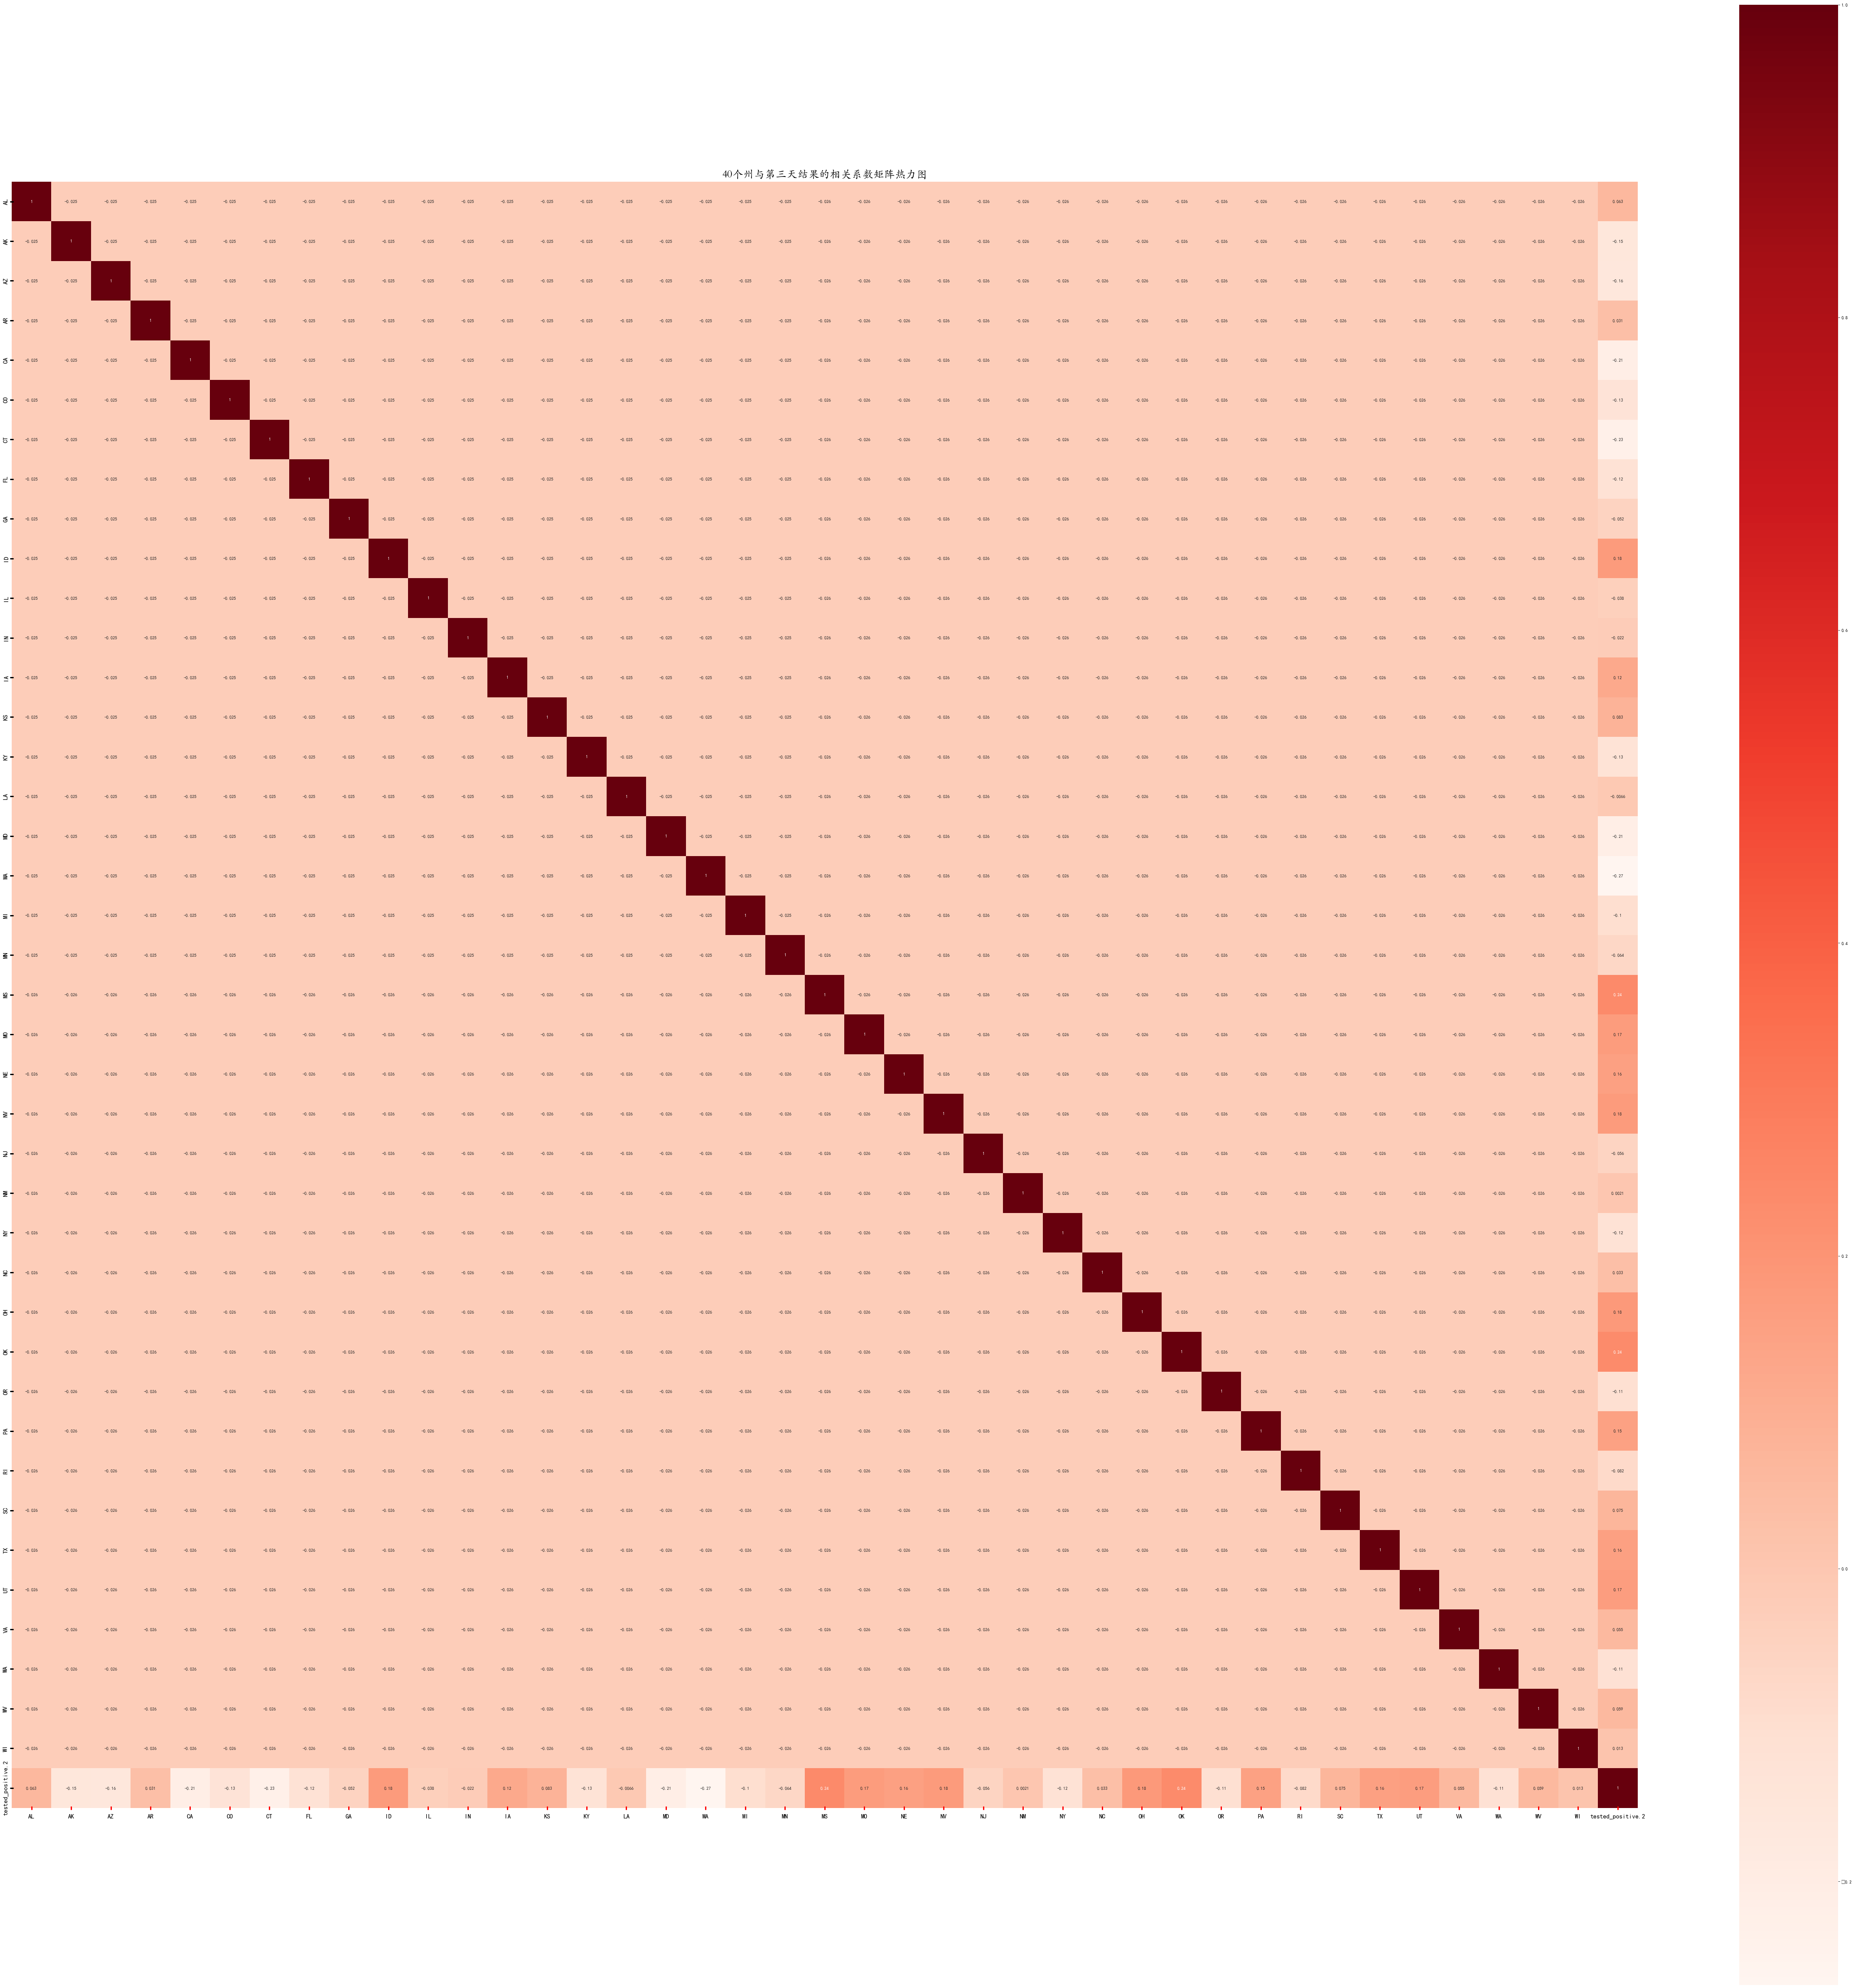

In [716]:
# 40个州与第三天结果的相关系数矩阵热力图
# 数据准备,将目标结果添加到40个州的独热编码之后
covid_train_state['tested_positive.2'] = covid_train['tested_positive.2']
# 计算所有变量的相关系数，并将结果存储在 d 中
d = covid_train_state.corr()
# 创建图形，并设置其大小为 84x84 英寸
plt.subplots(figsize = (84,84))
# 用Seaborn库的heatmap函数创建热力图
sns.heatmap(d,annot = True,vmax = 1,square = True,cmap = "Reds")
# 设置标题
plt.title('40个州与第三天结果的相关系数矩阵热力图',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=8,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线
plt.tick_params(axis='y',which='major',direction='inout',size=8,width=3,labelsize=15,labelcolor='k')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16672\2187023470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_train_day1['tested_positive.2'] = covid_train['tested_positive.2']


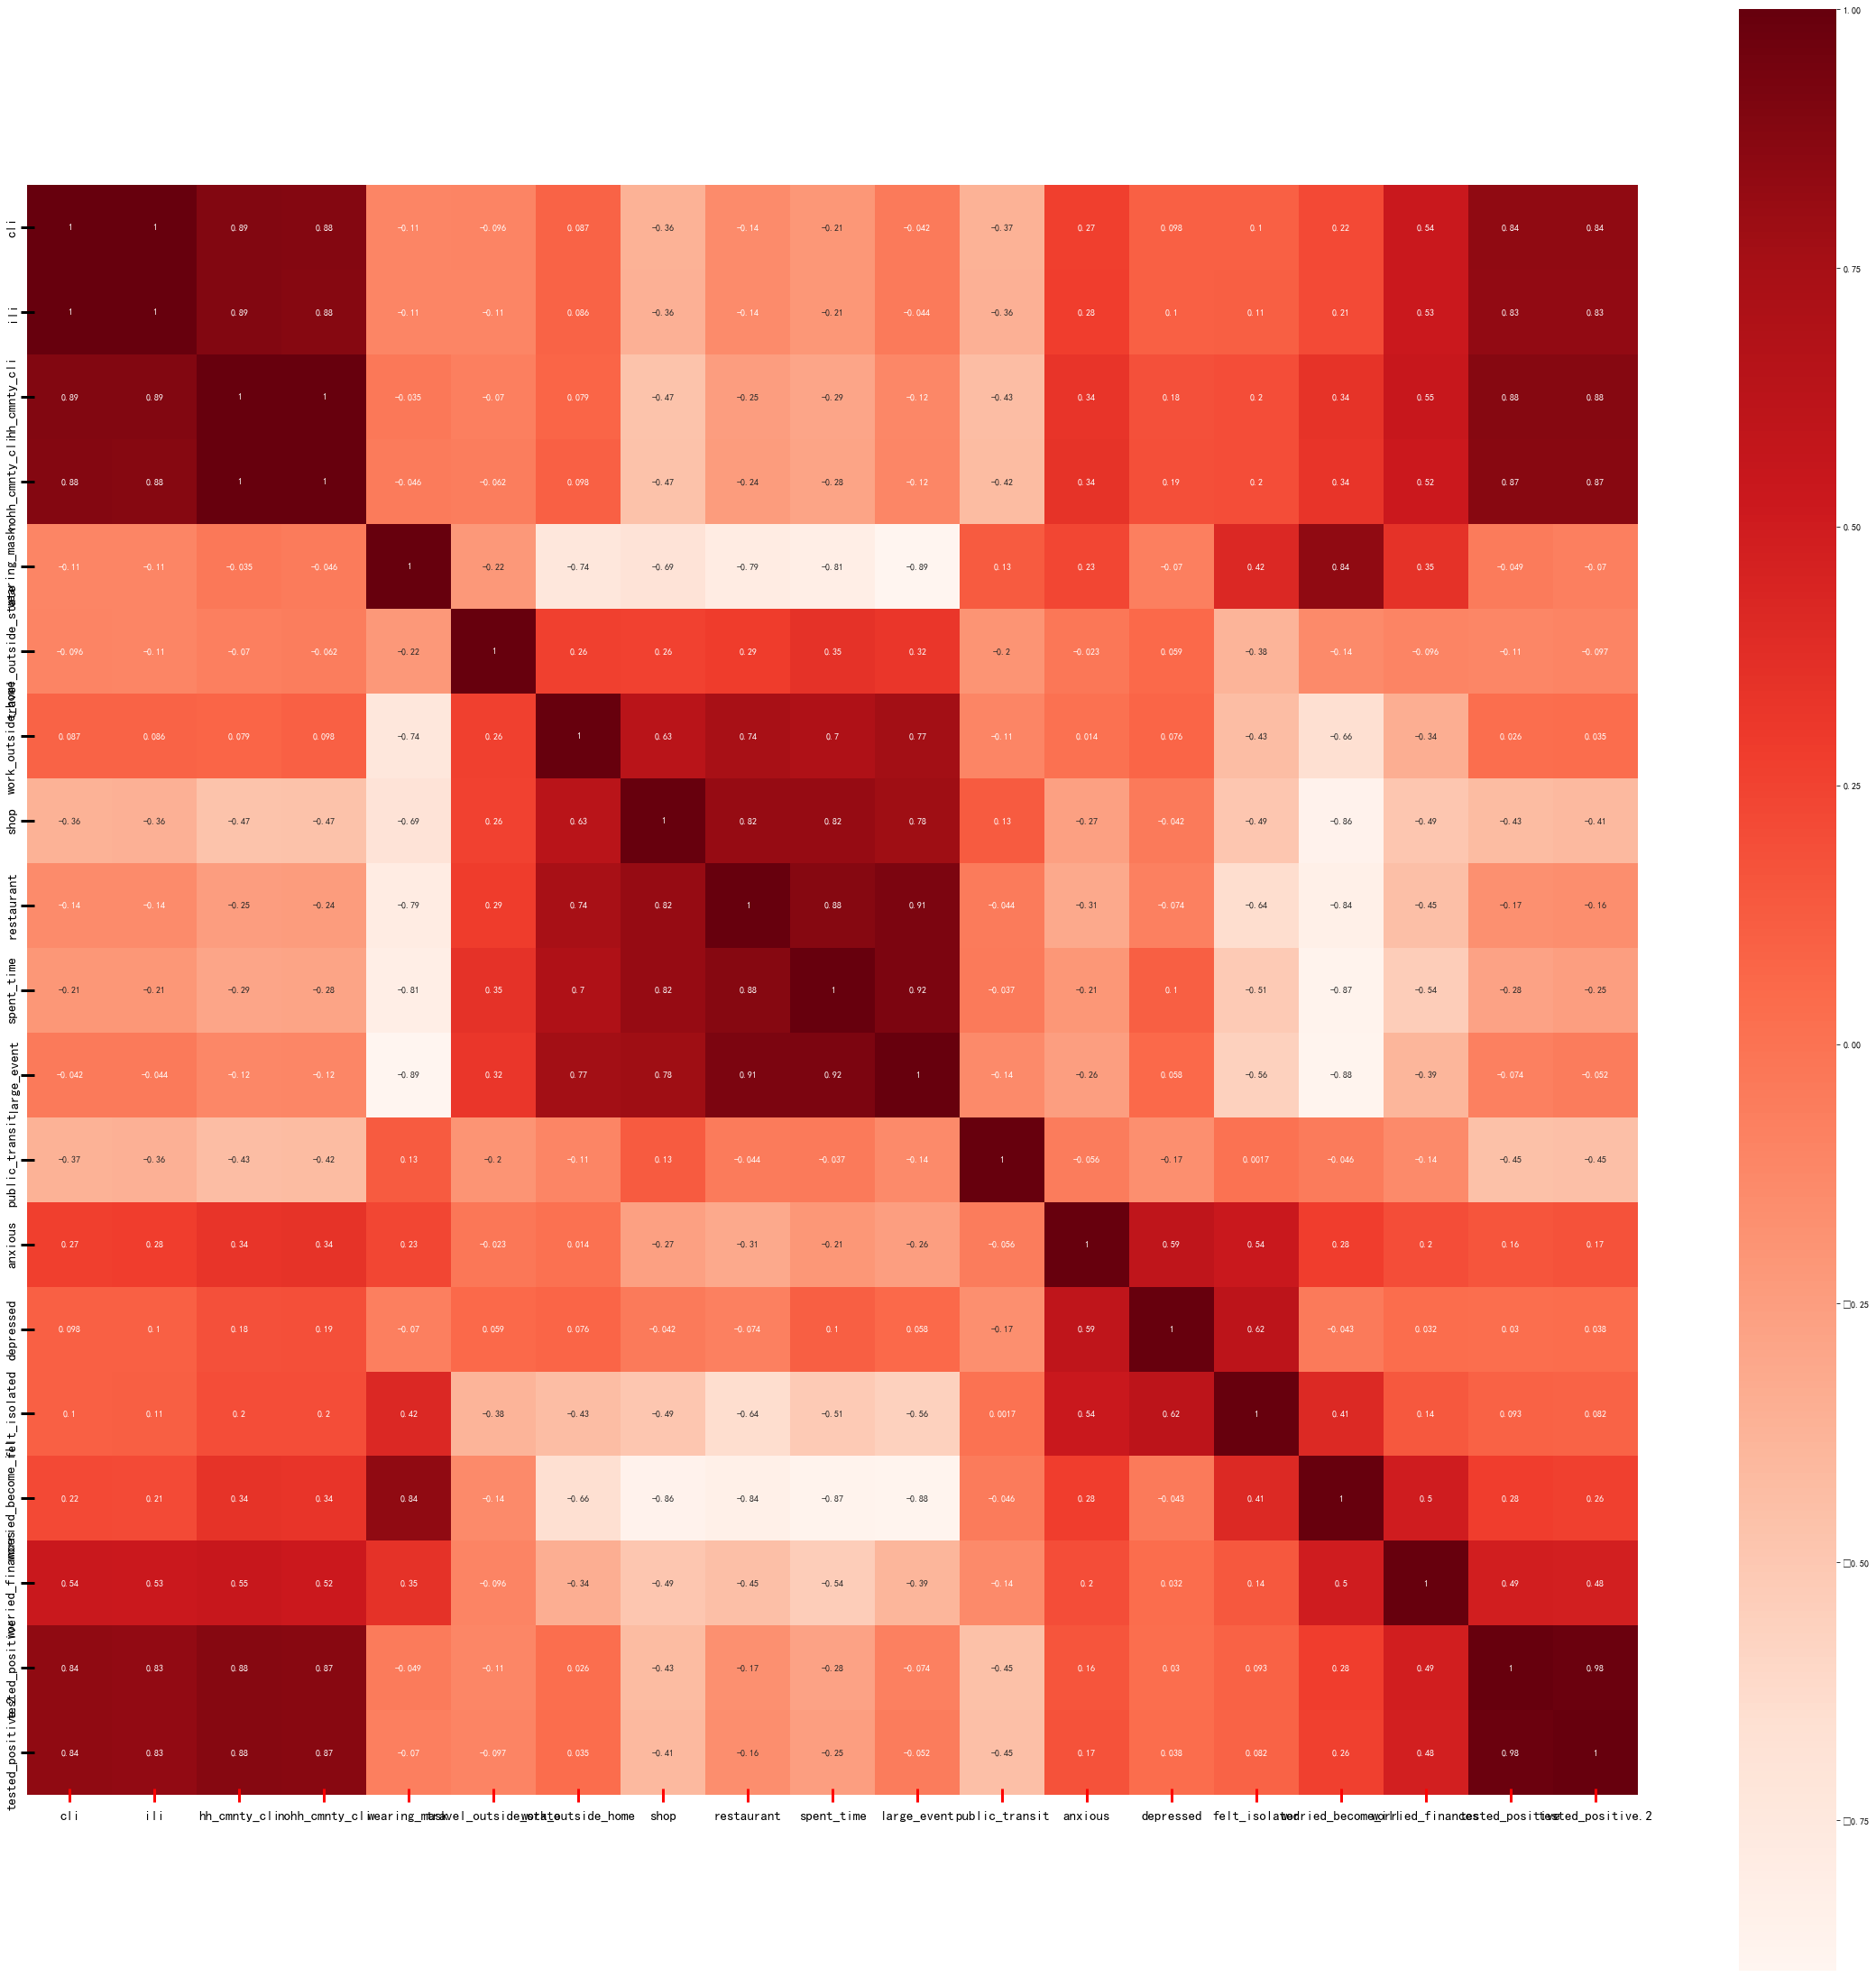

In [717]:
# 第一天数据与第三天结果的相关系数矩阵热力图
#数据准备
covid_train_day1['tested_positive.2'] = covid_train['tested_positive.2']
d = covid_train_day1.corr()
plt.subplots(figsize = (40,40))
sns.heatmap(d,annot = True,vmax = 1,square = True,cmap = "Reds")
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=15,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线
plt.tick_params(axis='y',which='major',direction='inout',size=15,width=3,labelsize=15,labelcolor='k')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16672\1274762329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_train_day2['tested_positive.2'] = covid_train['tested_positive.2']


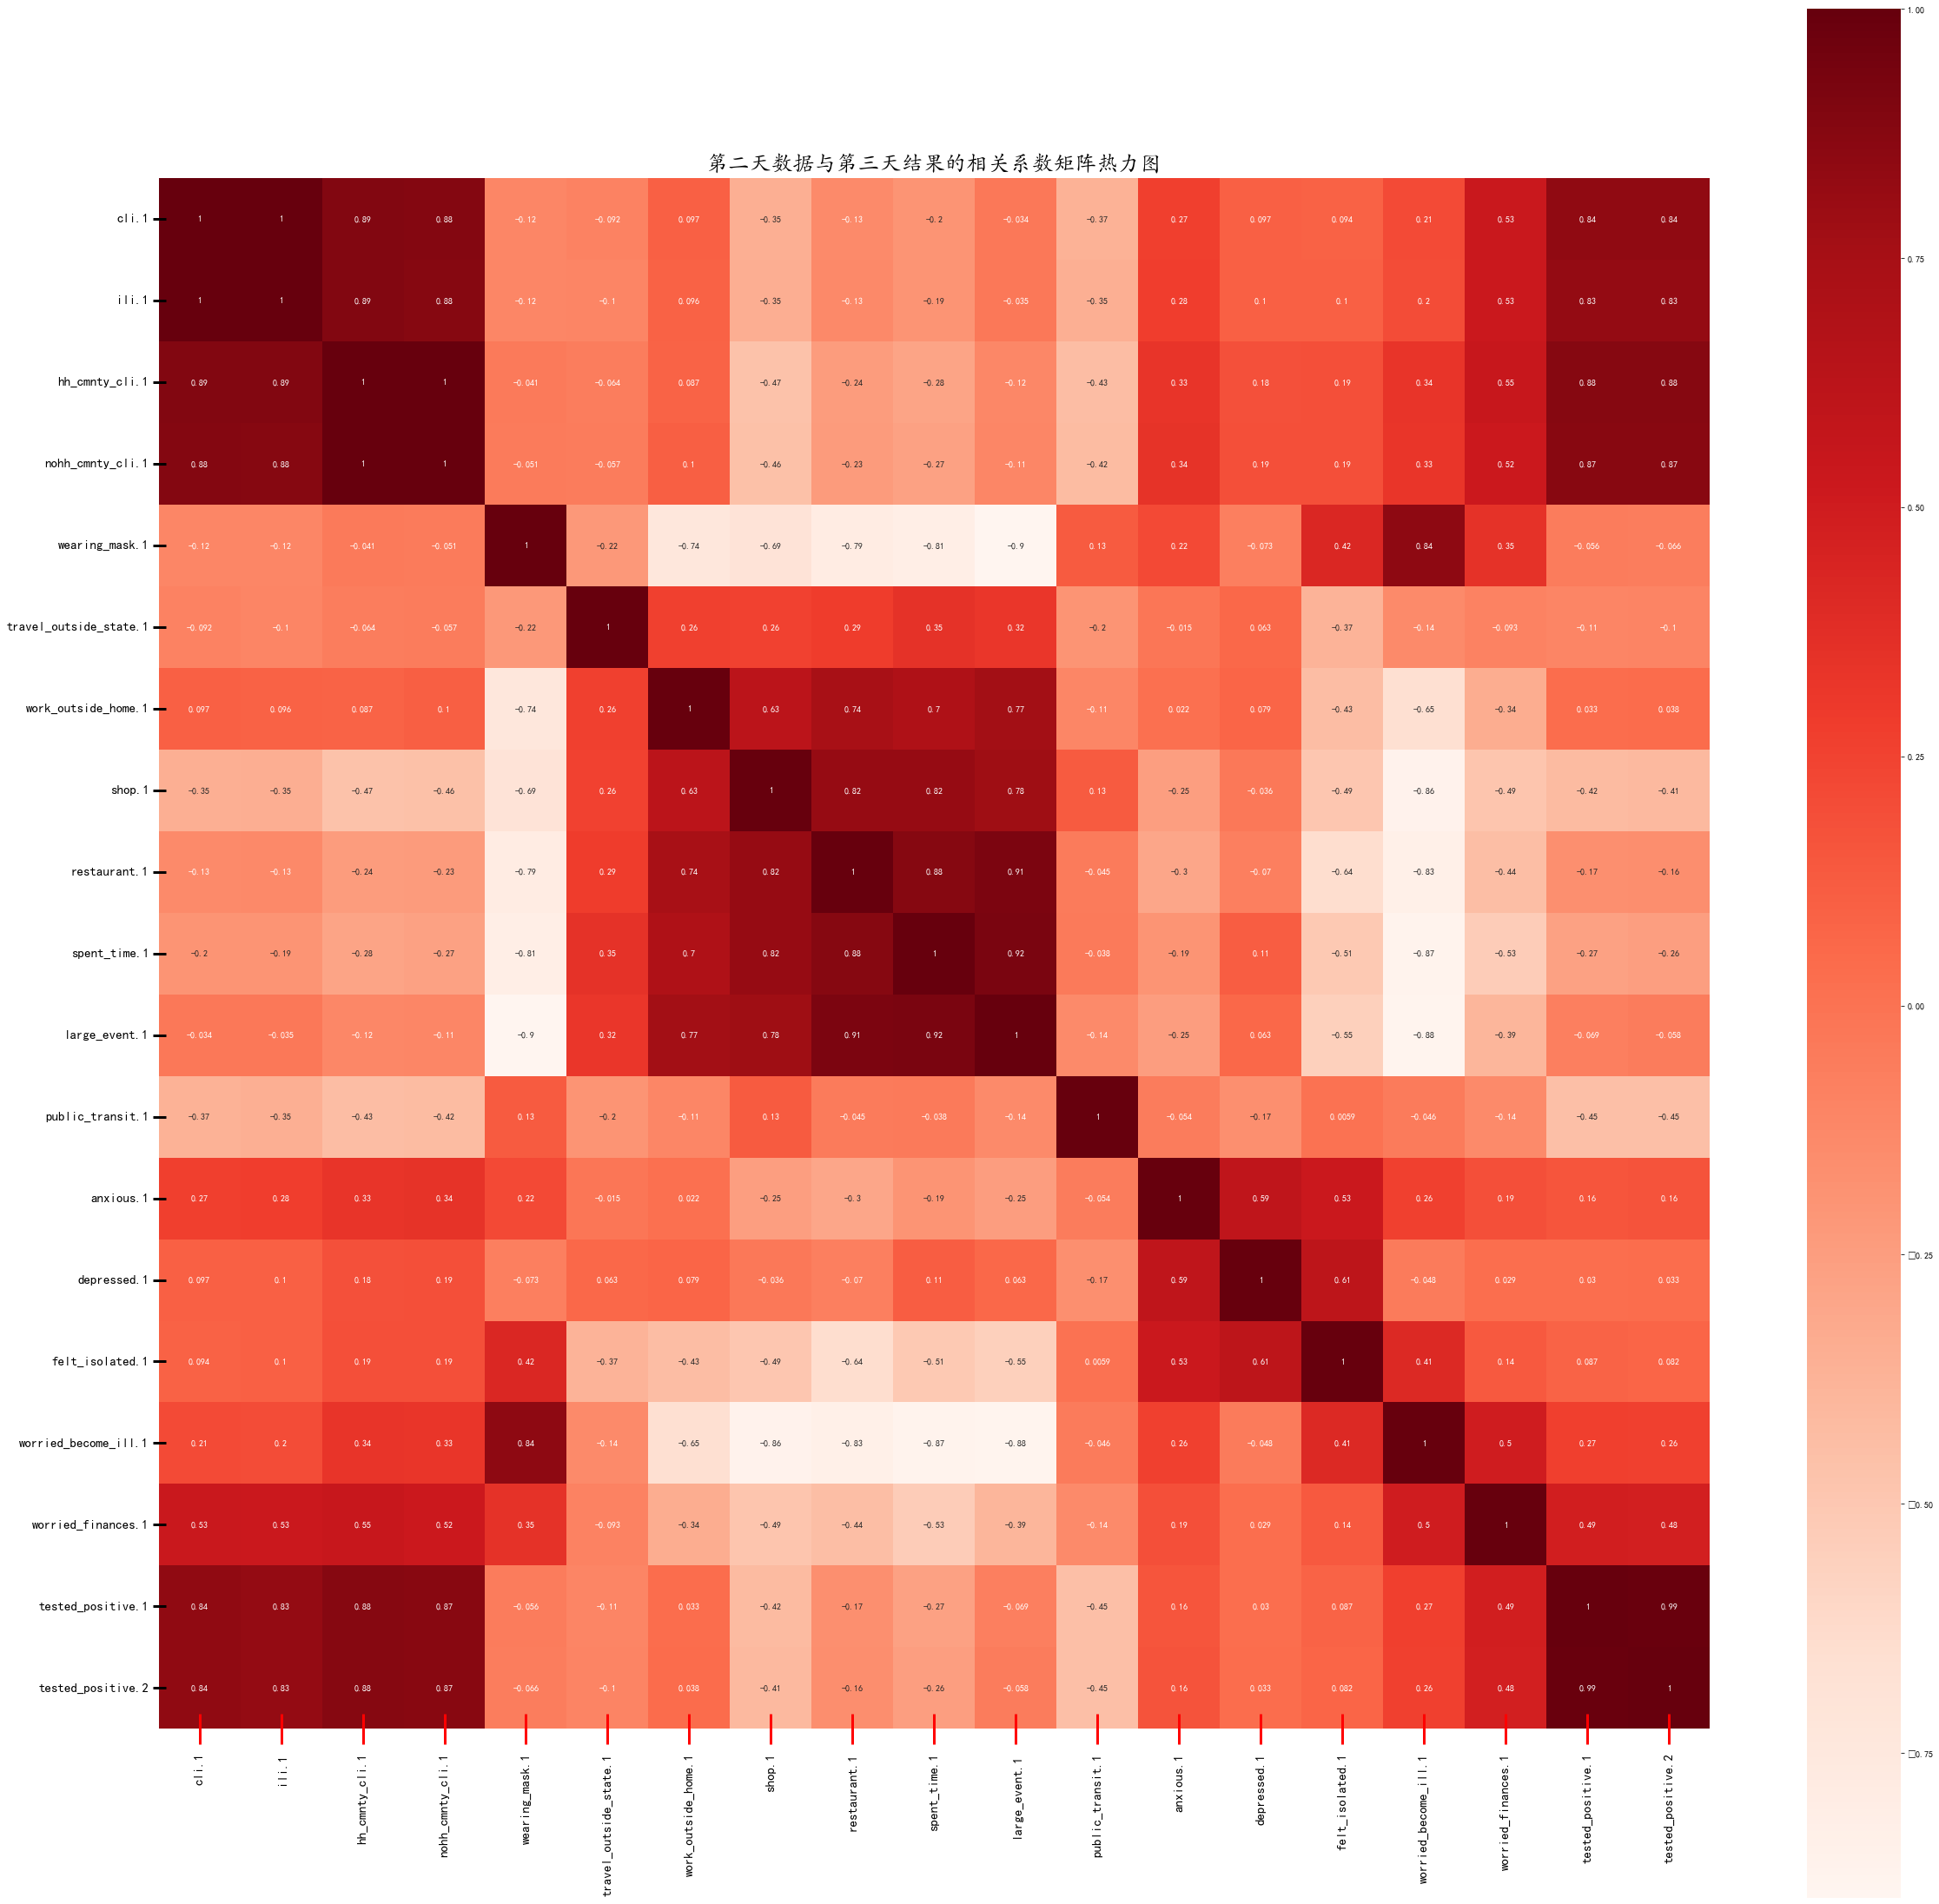

In [718]:
#第二天数据与第三天结果的相关系数矩阵热力图
#数据准备
covid_train_day2['tested_positive.2'] = covid_train['tested_positive.2']
d = covid_train_day2.corr()
plt.subplots(figsize = (40,40))
sns.heatmap(d,annot = True,vmax = 1,square = True,cmap = "Reds")
# 设置标题
plt.title('第二天数据与第三天结果的相关系数矩阵热力图',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=35,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线
plt.tick_params(axis='y',which='major',direction='inout',size=15,width=3,labelsize=15,labelcolor='k')
plt.show()

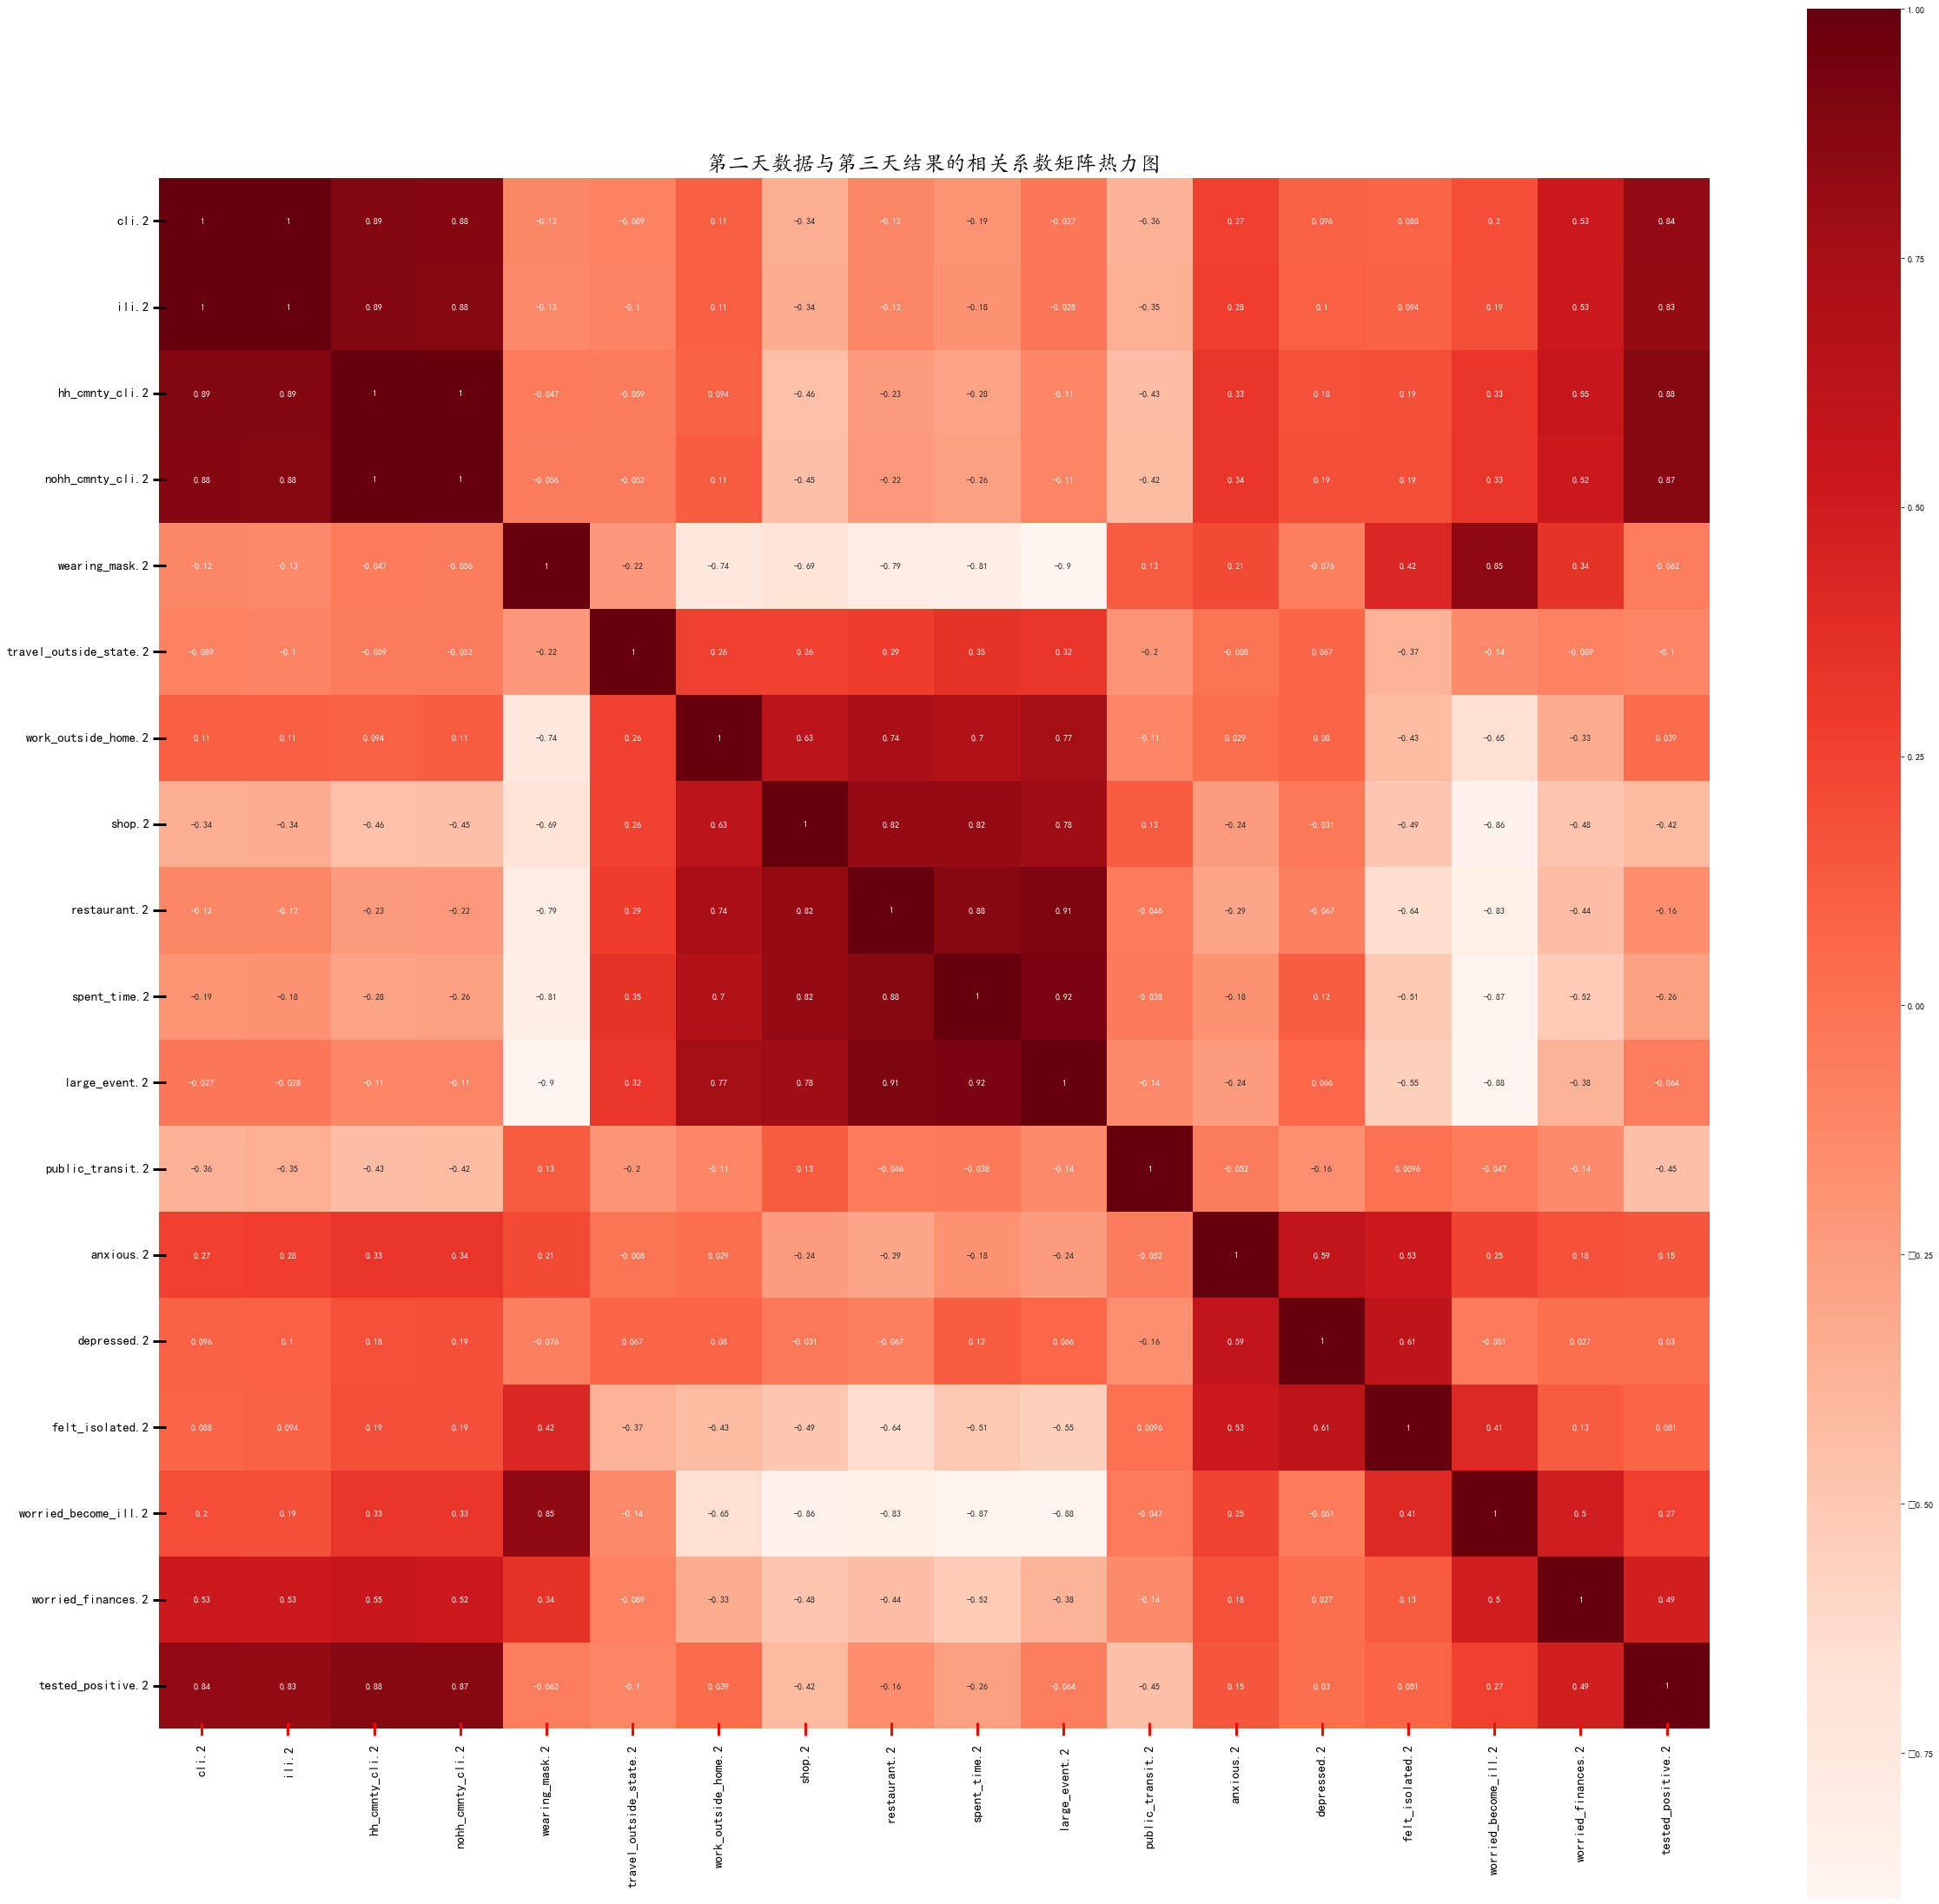

In [719]:
#第三天数据与第三天结果的相关系数矩阵热力图
# 获得相关系数矩阵
d = covid_train_day3.corr()
plt.subplots(figsize = (40,40))
sns.heatmap(d,annot = True,vmax = 1,square = True,cmap = "Reds")
# 设置标题
plt.title('第二天数据与第三天结果的相关系数矩阵热力图',fontproperties='STKAITI',fontsize=25,pad=10)
# 设置x轴刻度线
plt.tick_params(axis='x',which='major',direction='inout',color='r',pad=10,size=15,width=3,labelsize=15,labelcolor='k')
# 设置y轴刻度线
plt.tick_params(axis='y',which='major',direction='inout',size=15,width=3,labelsize=15,labelcolor='k')
plt.show()

In [720]:
# 特征选择库
from sklearn.feature_selection import SelectKBest
# 评分函数
from sklearn.feature_selection import f_regression
# 创建SelectKBest对象，使用f_regression作为评分函数，选择前30个最重要的特征
bestfeatures = SelectKBest(score_func=f_regression, k=30)
# 使用训练数据train和目标变量target拟合SelectKBest模型，得到特征与目标变量相关的分数
fit = bestfeatures.fit(train,target)
# 将得分转换为DataFrame格式，并保存特征名称和对应的分数
train_scores = pd.DataFrame(fit.scores_)  # 分数
train_columns = pd.DataFrame(train.columns)  # 对应的特征值
featureScores = pd.concat([train_columns,train_scores],axis=1)  # 合并表格
featureScores.columns = ['Specs','Score']  # 列命名
# 按照分数降序排序
featureScores = featureScores.sort_values(by='Score', ascending=False)
# 输出特征得分的统计摘要信息
featureScores.head(30)

,Specs,Score
75,tested_positive.1,148069.658278
57,tested_positive,69603.872591
42,hh_cmnty_cli,9235.492094
60,hh_cmnty_cli.1,9209.019558
78,hh_cmnty_cli.2,9097.375172
43,nohh_cmnty_cli,8395.421300
61,nohh_cmnty_cli.1,8343.255927
79,nohh_cmnty_cli.2,8208.176435
40,cli,6388.906849
58,cli.1,6374.548000


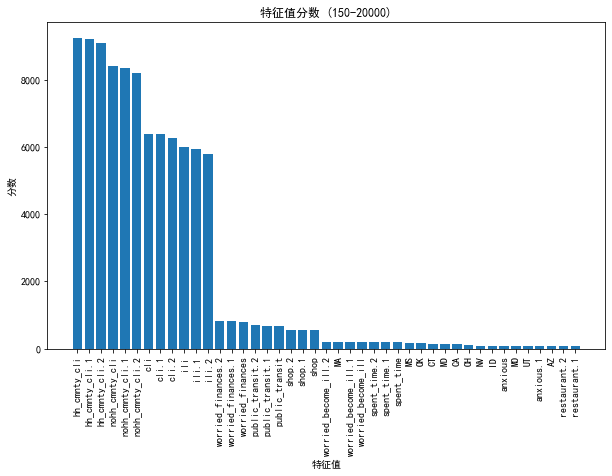

In [721]:
# 绘制特征值分数条形图
# 选择分数大于150且小于20000的特征
filtered_features = featureScores[(featureScores['Score'] > 70) & (featureScores['Score'] < 20000)]
# 设置画布大小
plt.figure(figsize=(10, 6))
# 绘制条形图
plt.bar(filtered_features['Specs'], filtered_features['Score'])
plt.xlabel('特征值') # x轴标签
plt.ylabel('分数')  # y轴标签
plt.title('特征值分数 (150-20000)') # 设置标题
plt.xticks(rotation=90)
plt.show()

In [722]:
# 创建SelectKBest对象，使用f_regression作为评分函数，选择前30个最重要的特征
bestfeatures = SelectKBest(score_func=f_regression, k=30)
# 使用训练数据train和目标变量target拟合SelectKBest模型，得到特征与目标变量相关的分数
fit = bestfeatures.fit(train,target)
# 得到前30个特征值的索引
cols = bestfeatures.get_support(indices=True)

In [723]:
# 为训练数据集选取特征值
train = train.iloc[:,cols]
# 为测试数据集选取特征值
test2 = covid_test1.iloc[:,cols]
# 去除MA州这一列
train1 = train.drop('MA',axis=1)
# 去除MA州这一列
test2 = test2.drop('MA',axis=1)

In [724]:
train1

,cli,ili,hh_cmnty_cli,nohh_cmnty_cli,shop,spent_time,public_transit,worried_become_ill,worried_finances,tested_positive,...,tested_positive.1,cli.2,ili.2,hh_cmnty_cli.2,nohh_cmnty_cli.2,shop.2,spent_time.2,public_transit.2,worried_become_ill.2,worried_finances.2
0,0.814610,0.771356,25.648907,21.242063,63.139094,44.726055,1.716262,53.439316,43.279629,19.586492,...,20.151838,0.897802,0.887893,26.060544,21.503832,62.434539,43.430423,1.602635,53.991549,43.604229
1,0.838995,0.807767,25.679101,21.280270,63.318650,44.385166,1.664819,53.256795,43.622728,20.151838,...,20.704935,0.972842,0.965496,25.754087,21.016210,62.024517,43.196313,1.641863,54.185521,42.665766
2,0.897802,0.887893,26.060544,21.503832,62.434539,43.430423,1.602635,53.991549,43.604229,20.704935,...,21.292911,0.955306,0.963079,25.947015,20.941798,62.116842,43.362200,1.677523,53.637069,42.972417
3,0.972842,0.965496,25.754087,21.016210,62.024517,43.196313,1.641863,54.185521,42.665766,21.292911,...,21.166656,0.947513,0.968764,26.350501,21.109971,61.294809,42.954574,1.578030,52.446223,42.907472
4,0.955306,0.963079,25.947015,20.941798,62.116842,43.362200,1.677523,53.637069,42.972417,21.166656,...,19.896607,0.883833,0.893020,26.480624,21.003982,60.664482,43.290957,1.641667,52.560315,43.321985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.655823,0.659976,25.265366,20.468897,50.265694,31.597793,1.768811,68.115748,38.478143,13.869286,...,13.434180,0.586713,0.597559,25.271178,20.770195,50.024971,30.839219,1.760094,68.024690,38.920206
2696,0.598352,0.602552,25.299465,20.756444,50.050349,31.656358,1.789015,67.691795,38.953184,13.434180,...,13.008853,0.576435,0.595312,24.607461,20.176201,49.885129,30.617100,1.780730,67.855755,39.224244
2697,0.586713,0.597559,25.271178,20.770195,50.024971,30.839219,1.760094,68.024690,38.920206,13.008853,...,12.725638,0.562426,0.572969,24.020275,19.654514,50.056772,30.595194,1.921828,67.731162,38.740651
2698,0.576435,0.595312,24.607461,20.176201,49.885129,30.617100,1.780730,67.855755,39.224244,12.725638,...,12.613441,0.600671,0.611160,23.797738,19.519105,49.620924,30.420998,1.992580,67.795100,38.595125


In [725]:
from sklearn.preprocessing import StandardScaler
# 创建StandardScaler对象
scaler = StandardScaler()
# 对训练数据表（covid_train1）中的特征值train进行标准化处理
train1 = scaler.fit_transform(train1)
# 对测试数据表（covid_test1）中的特征值进行标准化处理
test3 = scaler.fit_transform(test2)

In [726]:
# 转换为张量类型
train1,target = torch.tensor(train1),torch.tensor(target)
print(train1,target,sep='\n')

tensor([[-0.4212, -0.5779, -0.4172,  ..., -0.7437, -1.7435, -0.1843],
        [-0.3631, -0.4920, -0.4139,  ..., -0.7065, -1.7123, -0.3637],
        [-0.2232, -0.3028, -0.3720,  ..., -0.6726, -1.8005, -0.3051],
        ...,
        [-0.9635, -0.9883, -0.4588,  ..., -0.4406,  0.4658, -1.1141],
        [-0.9879, -0.9936, -0.5318,  ..., -0.3734,  0.4761, -1.1419],
        [-1.0213, -1.0463, -0.5964,  ..., -0.3986,  0.5547, -1.1689]],
       dtype=torch.float64)
tensor([20.7049, 21.2929, 21.1667,  ..., 12.6134, 12.4772, 11.8117],
       dtype=torch.float64)


In [727]:
# 切割数据样本 20%验证集；80%训练集
X_train,X_test,y_train,y_test=train_test_split(train1,target,test_size=0.2,random_state=42)
#检查训练集和验证集中样本的形态
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([2160, 29]),
 torch.Size([540, 29]),
 torch.Size([2160]),
 torch.Size([540]))

In [728]:
# 将样本数据转换为 PyTorch 的张量类型
# 训练集数据
X_train = torch.tensor(X_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
# 测试集数据
X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)
# 将需要预测数据转换为 PyTorch 的张量类型
test4 = torch.tensor(test3, dtype=torch.float32)
# 查看维度信息
X_train.shape,X_test.shape,y_train.shape,y_test.shape,test4.shape

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16672\2395302333.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train,dtype=torch.float32)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16672\2395302333.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train,dtype=torch.float32)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16672\2395302333.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test,dtype=torch.float32)
C:\Users\Administrator\AppD

(torch.Size([2160, 29]),
 torch.Size([540, 29]),
 torch.Size([2160]),
 torch.Size([540]),
 torch.Size([893, 29]))

In [748]:
# 定义线性回归模型类
class LinearRegression(nn.Module):
    def __init__(self, input_size):
        # 调用父类nn.Module的构造方法，以确保正确初始化线性回归模型的属性和状态。
        super(LinearRegression, self).__init__()
        # 定义线性层，输入特征维度为input_size，输出特征维度为1
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        # 前向传播过程，将输入x通过线性层进行线性变换
        out = self.fc(x)
        return out

In [749]:
# 设置随机种子
torch.manual_seed(42)

In [750]:
# 设置输入特征的维度
input_dim = X_train.shape[1]
# 设置学习率
lr = 0.8
# 设置迭代次数
num_epochs = 501

In [751]:
# L1正则化权重的自动选取
from sklearn.linear_model import LassoCV
# 创建一个LassoCV对象，指定正则化路径和交叉验证的折数
lasso_cv = LassoCV(alphas=[0.0001,0.001, 0.01, 0.1, 1.0], cv=5,max_iter=100000)
# 在训练数据上拟合模型
lasso_cv.fit(X_train, y_train)
# 选择最佳正则化权重
best_l1_lambda = lasso_cv.alpha_
# 打印输出最佳的L1正则化权重
print("best_l1_lambda:", best_l1_lambda)

best_l1_lambda: 0.001


e:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [752]:
# 模型初始化
model = LinearRegression(input_dim)
# 定义损失函数
criterion = nn.MSELoss()
# 使用Adam优化器
optimizer = torch.optim.Adam(model.parameters(), lr)

In [738]:
# 定义存储损失的列表
train_losses = []
train_epochs = []
rmse_list = []
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    # 计算L1正则化项
    # 创建新的变量以避免原位操作
    l1_regularization = torch.tensor(0., dtype=torch.float32)  
    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)
    # 计算带有L1正则化的总损失
    l1_loss = loss + best_l1_lambda * l1_regularization
    # 反向传播和优化器更新
    optimizer.zero_grad()
    l1_loss.backward()
    optimizer.step()
    # 在训练集上计算MSE
    with torch.no_grad():
        train_predictions = model(X_train)
        mse = criterion(train_predictions, y_train)
    # 将训练集标签转换为张量
    y_train = y_train.view(-1, 1)
    # 计RMSE并将其添加到列表中
    rmse = torch.sqrt(mse)
    # 每迭代100次打印损失
    if (epoch+1) % 5 == 0:
        # 将数据存储到列表中，便于可视化分析
        train_losses.append(loss.item())
        train_epochs.append(epoch+1)
        rmse_list.append(rmse.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, RMSE: {rmse:.4f}')

Epoch [5/501], Loss: 241.4730, RMSE: 14.7153
Epoch [10/501], Loss: 123.9267, RMSE: 9.7103
Epoch [15/501], Loss: 52.6473, RMSE: 5.7869
Epoch [20/501], Loss: 18.3382, RMSE: 3.0301
Epoch [25/501], Loss: 4.6796, RMSE: 1.5534
Epoch [30/501], Loss: 3.6083, RMSE: 1.9240
Epoch [35/501], Loss: 5.4594, RMSE: 2.4803
Epoch [40/501], Loss: 5.7744, RMSE: 2.4918
Epoch [45/501], Loss: 4.3155, RMSE: 2.0285
Epoch [50/501], Loss: 2.4858, RMSE: 1.4096
Epoch [55/501], Loss: 1.3362, RMSE: 1.0920
Epoch [60/501], Loss: 1.1812, RMSE: 1.1393
Epoch [65/501], Loss: 1.3896, RMSE: 1.1709
Epoch [70/501], Loss: 1.3385, RMSE: 1.1322
Epoch [75/501], Loss: 1.2068, RMSE: 1.0993
Epoch [80/501], Loss: 1.1344, RMSE: 1.0535
Epoch [85/501], Loss: 1.0775, RMSE: 1.0387
Epoch [90/501], Loss: 1.0814, RMSE: 1.0405
Epoch [95/501], Loss: 1.0752, RMSE: 1.0357
Epoch [100/501], Loss: 1.0640, RMSE: 1.0308
Epoch [105/501], Loss: 1.0508, RMSE: 1.0239
Epoch [110/501], Loss: 1.0428, RMSE: 1.0207
Epoch [115/501], Loss: 1.0371, RMSE: 1.0179
E

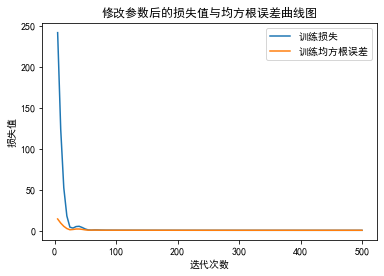

In [739]:
# 绘制训练损失与均方根误差曲线图
plt.plot(train_epochs, train_losses, label='训练损失')
plt.plot(train_epochs, rmse_list, label='训练均方根误差')
plt.xlabel('迭代次数')
plt.ylabel('损失值')
plt.title('修改参数后的损失值与均方根误差曲线图')
plt.legend()
plt.show()

In [740]:
# 模型预测
test_inputs = torch.Tensor(X_test)
predictions = model(test_inputs).squeeze().detach().numpy()

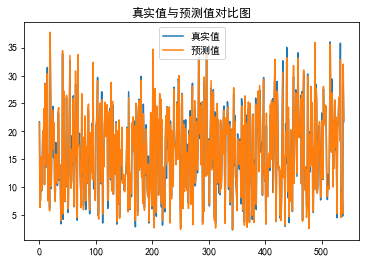

In [741]:
# 可视化分析
plt.plot(y_test.squeeze(), label='真实值')
plt.plot(predictions, label='预测值')
plt.title('真实值与预测值对比图')
plt.legend()
plt.show()

In [746]:
# 设置推断模式
model.eval()
# 将处理好的测试集数据输入模型中
test_outputs = model(test4)
# 将得到的预测值转为Numpy类型
predicted_labels = test_outputs.detach().numpy()

In [744]:
# 创建新表
LR_sampleSubmission = pd.DataFrame()
LR_sampleSubmission .to_csv(r'C:\Users\Administrator\Desktop\3-COVID-19\LR_sampleSubmission.csv', index=False)
# 写入id列
LR_sampleSubmission["id"] =sampleSubmission["id"]
# 将数据写入特定一列
LR_sampleSubmission['tested_positive'] = predicted_labels[:len(sampleSubmission)]  # 只写入与数据帧行数相匹配的部分数组数据
# 写回 CSV 文件
LR_sampleSubmission.to_csv(r'C:\Users\Administrator\Desktop\3-COVID-19\LR_sampleSubmission.csv', index=False)

In [745]:
LR_sampleSubmission

,id,tested_positive
0,0,20.741913
1,1,2.837518
2,2,2.747697
3,3,11.670910
4,4,3.057121
...,...,...
888,888,13.742314
889,889,4.810709
890,890,32.122612
891,891,26.171761
